##### 解析 LINE 的訊息
順利將 LINE BOT 串接 Webhook 後，這篇教學會先使用 Flask 函式庫接收訊息，透過 json 標準函式庫將訊息轉換成字典格式，\
解析各種訊息包含的屬性，理解訊息的內容後，開發 LINE BOT 才能更得心應手。

##### 將訊息轉換為 json 格式 
將 LINE BOT 串連 Colab + ngrok 所建立 Webhook，回到 Colab 寫入下方的程式碼，使用 print 印出 json 格式的 body 資料。

這是第一步，將 LINE BOT 串連 ngrok 建立 Webhook ，以下程式執行後，打開 ngrok終端機輸入 ngrok http 127.0.0.1:5000，接著複製 Forwarding 網址複製到 LINE Developers -> Messaging API -> Webhook URL。

In [ ]:
from flask import Flask, request

# 載入 json 標準函式庫，處理回傳的資料格式
import json

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.exceptions import InvalidSignatureError
from linebot.models import MessageEvent, TextMessage, TextSendMessage

app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)                    # 取得收到的訊息內容
    try:
        json_data = json.loads(body)                         # json 格式化訊息內容
        access_token = '1dZwuiJVECogLjRc6bgRGrXhpLQDnot1SeeAHH2tp9d0EpJ4sjGCJwjPkG9pv9PdxIGBJiTDomJBrHpp5KzCd9/QZuI+rnNI944nd5dY3btiCge69T/wdB04t89/1O/w1cDnyilFU='
        secret = '2cae0992c275262c83f15f374'
        line_bot_api = LineBotApi(access_token)              # 確認 token 是否正確
        handler = WebhookHandler(secret)                     # 確認 secret 是否正確
        signature = request.headers['X-Line-Signature']      # 加入回傳的 headers
        handler.handle(body, signature)                      # 綁定訊息回傳的相關資訊
        tk = json_data['events'][0]['replyToken']            # 取得回傳訊息的 Token
        type = json_data['events'][0]['message']['type']     # 取得 LINe 收到的訊息類型
        if type=='text':
            msg = json_data['events'][0]['message']['text']  # 取得 LINE 收到的文字訊息
            print(msg)                                       # 印出內容
            reply = msg
        else:
            reply = '你傳的不是文字呦～'
        print(reply)
        line_bot_api.reply_message(tk,TextSendMessage(reply))# 回傳訊息
    except:
        print(body)                                          # 如果發生錯誤，印出收到的內容
    return 'OK'                                              # 驗證 Webhook 使用，不能省略

if __name__ == "__main__":
    app.run()

這是第二步，做完第一步之後，就可以執行以下程式，接著再LINE輸入內容後，即可在輸出看見內容已被轉換成 json格式。

In [ ]:
from flask import Flask, request
# from pyngrok import ngrok    # 本機環境不需要

import json

app = Flask(__name__)

# 本機環境不需要下面這三行
# port = "5000"               
# public_url = ngrok.connect(port).public_url
# print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\" ")

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)
    json_data = json.loads(body)
    print(json_data)               # 印出 json_data
    return 'OK'
if __name__ == "__main__":
  app.run()

完成後，執行程式，將連動 ngrok 的 Webhook 填入 LINE Message API 裡，Verify 驗證通過後，從 LINE 傳送訊息，接著就能在 Colab 的顯示區裡，\
就能看見傳送的訊息變成一串 json 的格式，從 json 格式的回應訊息裡，可以看到許多屬性值，使用字典搭配串列的方式就能取出指定的內容。

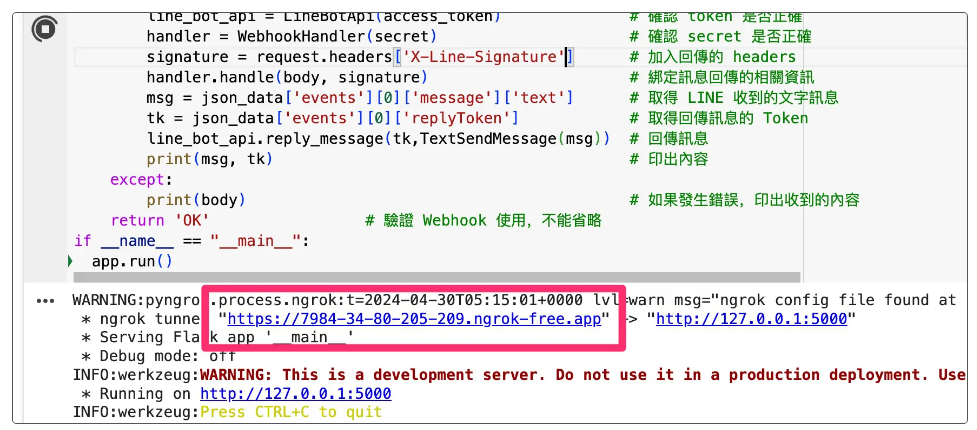

In [ ]:
{
  "destination":"U75595c589ed063df64ce5fa5ec2e70e2",
  "events":[
      {
        "type":"message",
        "message":{
            "type":"text",
            "id":"518957870239711681",
            "text":"今日午餐"
        },
        "timestamp":1722154299104,
        "source":{
            "type":"user",
            "userId":"U5cbe0a327d3c63423faa59ab3dd3f0ed"
        },
        "replyToken":"067509ba0d224fba9fe906b88aff8305",
        "mode":"active"
      }
  ]
}

##### 通用屬性 
通用屬性表示不論哪種格式的訊息，都會出現的屬性值。

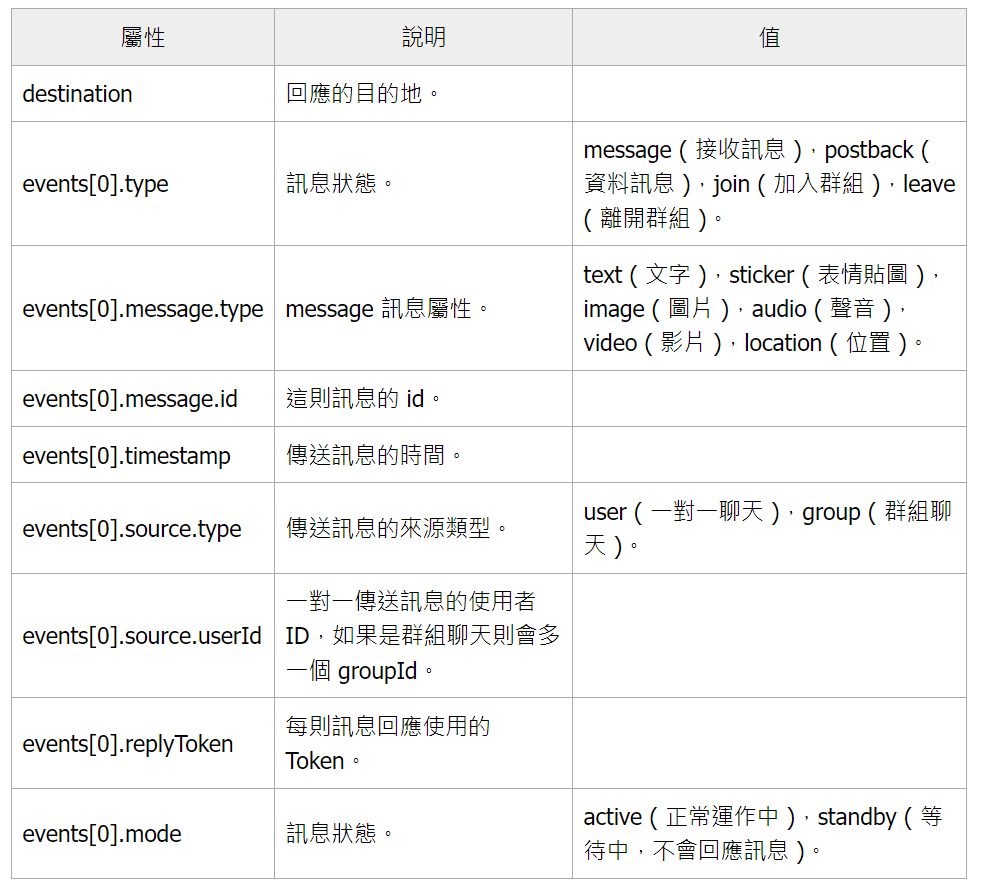

##### text 文字訊息屬性 
如果傳送文字訊息 ( 文字、tag 某人、網址 )，會出現文字訊息屬性。

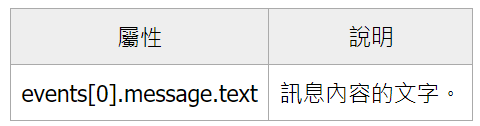

##### sticker 表情貼圖訊息屬性 
如果傳送表情貼圖，會出現表情貼圖的屬性。

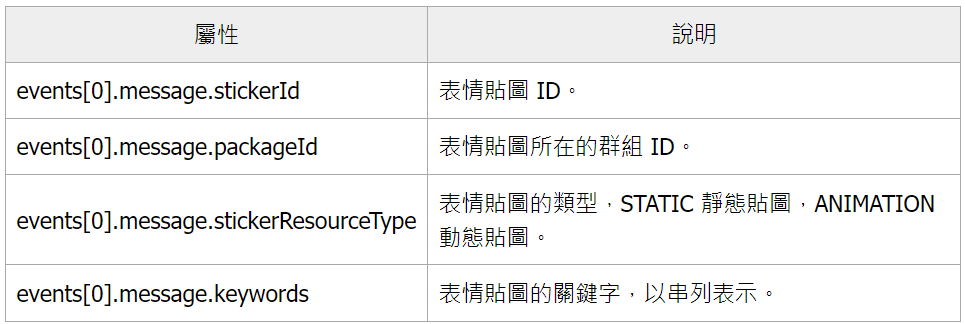

##### image 圖片訊息屬性 
如果傳送圖片，會出現圖片相關屬性。

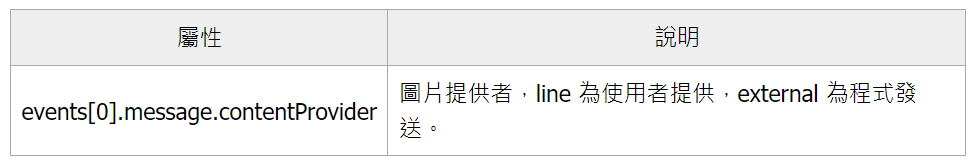

##### video 影片、audio 聲音訊息屬性 
如果傳送影片或聲音，會出現時間長度與提供者的屬性。

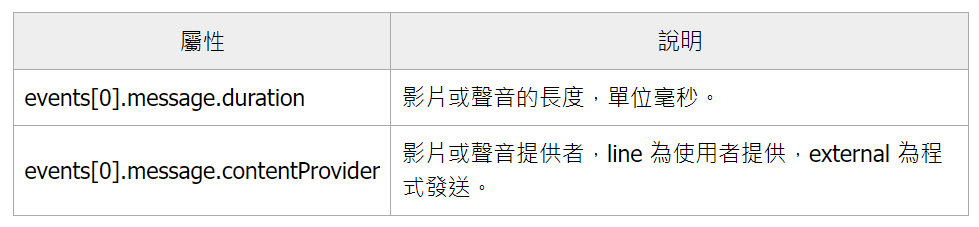

##### location 地點位置訊息屬性 
如果傳送地點資訊，會出現地理位置相關的屬性。

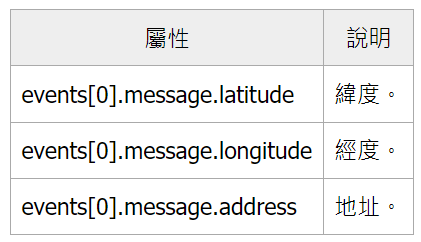

##### postback 訊息屬性 
如果收到的是 postback 資料，表示直接透過 API 發送，會出現 data 屬性。

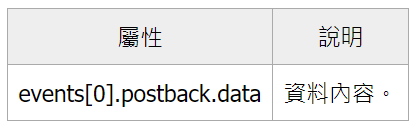

##### 小結 
能夠解析 LINE 的訊息後，就能進一步透過程式判斷該如何回應訊息，例如收到了傷心的貼圖，就可以回覆關心的文字，收到了地址查詢的要求，\
就能回覆地址的資訊，這也是打造一個 LINE BOT 的必經之路。